<a href="https://colab.research.google.com/github/JurijSevcenko1/data/blob/main/CW_HOWTO_dataset_manipulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CW Dataset manipulations


# Google Colab Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now recall the path in your Google Drive where you uploaded the lab materials, fill it in below and run the cell:

In [ ]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Computer_Vision/cw'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

TRAIN_SET_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset/train/')
print(os.listdir(TRAIN_SET_PATH))


['test_function.ipynb', 'CW_Dataset', 'Personal_Dataset', 'MISC']
['labels', 'images']


Import images function (Ref: Lecture 6, Giacomo Tarroni, Image classification with Bag of Visual Words)

In [ ]:
import numpy as np
import skimage.io as io
from collections import Counter

def import_selected_data(path, label_list=None):
    """Load images and labels from selected directories"""
    images = []
    labels = []

    if label_list is None:
        folder_names = [folder for folder in sorted(os.listdir(path)) if not folder.startswith('.')]
    else:
        folder_names = [folder for folder in sorted(os.listdir(path)) if folder in label_list]

    file_names = [];
    for folder in folder_names:
        file_names = [file for file in sorted(os.listdir(os.path.join(path, folder)))]

        for file in file_names:
            if file.endswith('.jpeg'):
              images.append(io.imread(os.path.join(path, folder, file)))
            else:
              labels.append(open(os.path.join(path, folder, file), "r").read())

    print("Labels: "+ str(Counter(labels)))
    return images, labels

In [ ]:
X, y = import_selected_data(TRAIN_SET_PATH)

Labels: Counter({'1': 1940, '0': 376, '2': 78})


In [ ]:
print(len(X))

2394


Display random labelled data (Ref: Lecture 7, Giacomo Tarroni, compare ground-truth labels and predicted classes on a few images)

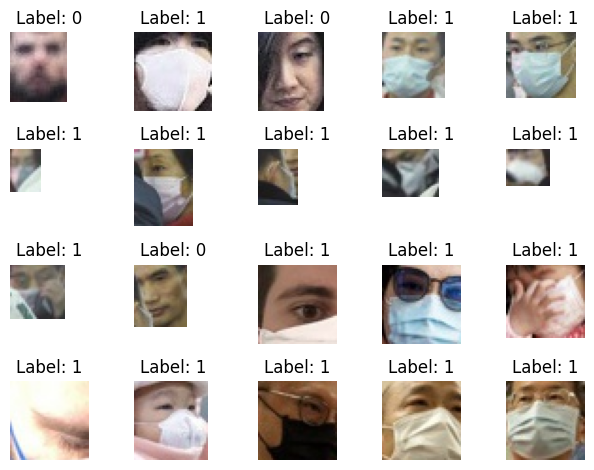

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 5, sharex=True, sharey=True)
ax = axes.ravel()

for i in range(20):
    ax[i].imshow(X[i])
    ax[i].set_title(f'Label: {y[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

Split the training dataset into train/validate (Ref: Lecture 6, Giacomo Tarroni, Image classification with Bag of Visual Words)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=25, stratify=y)

Check X_train and X_validate sizes

In [ ]:
# print(str(len(X_train))+", "+str(len(X_validate)))

Display pictures with labels for visual verification that the split has not caused errors

In [ ]:
# fig, axes = plt.subplots(4, 5, sharex=True, sharey=True)
# ax = axes.ravel()

# for i in range(20):
#     ax[i].imshow(X_validate[i])
#     ax[i].set_title(f'Label: {y_validate[i]}')
#     ax[i].set_axis_off()
# fig.tight_layout()
# plt.show()